<a href="https://colab.research.google.com/github/MehmetKaanErsoy/Tahmin-Projesi/blob/master/KitapTahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import linear_kernel

In [38]:
df = pd.read_csv("output.csv")
df.columns

Index(['Kitap Adı ', 'Yazar ', 'Yayınevi ', 'Tür', 'Fiyat ', 'Açıklama ',
       'Kaç Adet Satıldı '],
      dtype='object')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Tür',data=df,order=df['Tür'].value_counts().index[0:25])

In [40]:
df.loc[df.Tür == "K","Tür"] = "Kişisel Gelişim"
df.loc[df.Tür == "R","Tür"] = "Roman"
df.loc[df.Tür == "İ","Tür"] = "Roman"
df.loc[df.Tür == "G","Tür"] = "Genel"
df.loc[df.Tür == "H","Tür"] = "Hikaye"
df.loc[df.Tür == " ","Tür"] = "Roman"
df.loc[df.Tür == "1","Tür"] = "100 Temel Eser"
df.loc[df.Tür == "D","Tür"] = "Diğer"
df.loc[df.Tür == "A","Tür"] = "Araştırma"
df.loc[df.Tür == "F","Tür"] = "Felsefe"
df.loc[df.Tür == "B","Tür"] = "Bilim Kurgu"
df.loc[df.Tür == "F","Tür"] = "Felsefe"
df.loc[df.Tür == "M","Tür"] = "Masal"
df.loc[df.Tür == "F","Tür"] = "Felsefe"
df.loc[df.Tür == "Ç","Tür"] = "Çocuk Eğitimi"
df.loc[df.Tür == "Y","Tür"] = "Yeme-İçme"
df.loc[df.Tür == "Ş","Tür"] = "Şiir"
df.loc[df.Tür == "6","Tür"] = "Çocuk Eğitimi"
df.loc[df.Tür == "E","Tür"] = "Eğitim"
df.loc[df.Tür == "S","Tür"] = "Söyleşi"
df.loc[df.Tür == "O","Tür"] = "Çocuk Eğitimi"
df.loc[df.Tür == "T","Tür"] = "Roman"
df.loc[df.Tür == "P","Tür"] = "Roman"
df.loc[df.Tür == "J","Tür"] = "Roman"
df.loc[df.Tür == "L","Tür"] = "Roman"
df.loc[df.Tür == "U","Tür"] = "Roman"
df.loc[df.Tür == "N","Tür"] = "Roman"
df.loc[df.Tür == "Ö","Tür"] = "Roman"
df.loc[df.Tür == "r","Tür"] = "Roman"
df.loc[df.Tür == "C","Tür"] = "Roman"
df.loc[df.Tür == "Ü","Tür"] = "Roman"
df.loc[df.Tür == "g","Tür"] = "Roman"
df.loc[df.Tür == "V","Tür"] = "Roman"
df.loc[df.Tür == "2","Tür"] = "Roman"
df.loc[df.Tür == "s","Tür"] = "Roman"

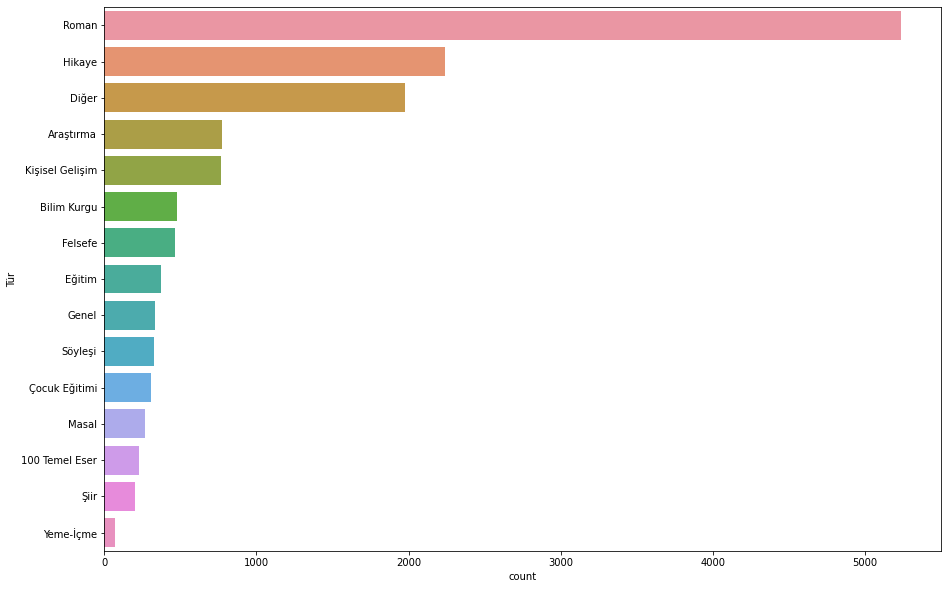

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(y='Tür',data=df,order=df['Tür'].value_counts().index[0:35])

([<matplotlib.patches.Wedge at 0x7f038751a590>,
 [Text(0.42899963685976117, 1.0128964959827798, 'Roman'),
  Text(-1.050843358247536, 0.3251587864829136, 'Hikaye'),
  Text(-0.8804346246820985, -0.659420102560494, 'Diğer'),
  Text(-0.33828193915368615, -1.046692566918492, 'Araştırma'),
  Text(0.036369752839821495, -1.0993985815337268, 'Kişisel Gelişim'),
  Text(0.3382820249023111, -1.046692539205278, 'Bilim Kurgu'),
  Text(0.5499290838287763, -0.9526688841141202, 'Felsefe'),
  Text(0.7174718299180949, -0.8338070359945283, 'Eğitim'),
  Text(0.8398688706753394, -0.7103662999259819, 'Genel'),
  Text(0.9352617065994713, -0.5790384617351811, 'Söyleşi'),
  Text(1.0076466461222602, -0.4411895698660169, 'Çocuk Eğitimi'),
  Text(1.0560070785244011, -0.30797572973589904, 'Masal'),
  Text(1.0836329423826208, -0.18904932209131003, '100 Temel Eser'),
  Text(1.096733261680764, -0.0847121757663758, 'Şiir'),
  Text(1.099857654183023, -0.017695777321670124, 'Yeme-İçme')],
 [Text(0.23399980192350606, 0.55

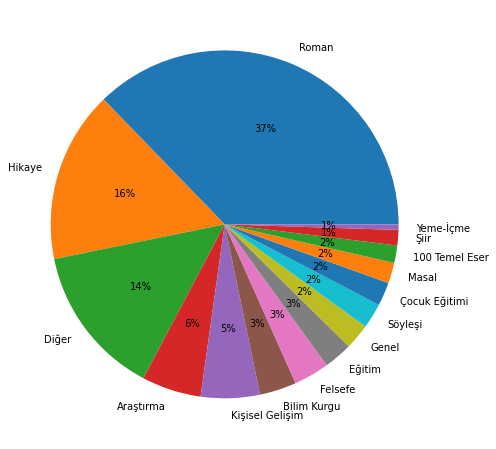

In [42]:
plt.figure(figsize=(13,8))
plt.pie(x=df['Tür'].value_counts(),labels=df['Tür'].value_counts().index, autopct='%0.f%%')

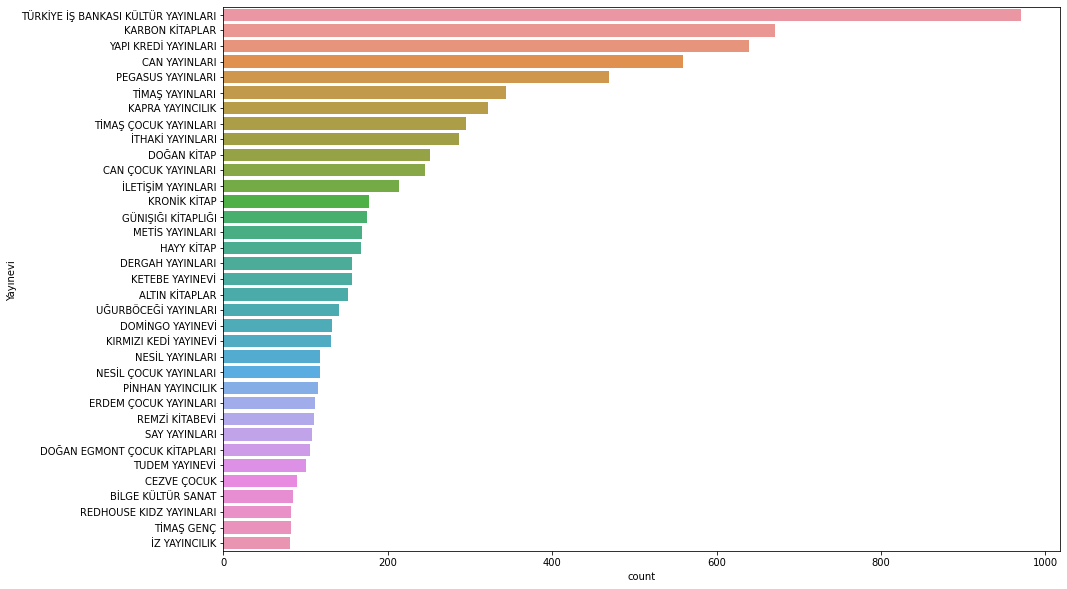

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(y='Yayınevi ',data=df,order=df['Yayınevi '].value_counts().index[0:35])

In [48]:
tfidf = TfidfVectorizer(min_df=1)

In [49]:
df['Açıklama '] = df['Açıklama '].fillna('')

In [50]:
tfidf_matrix = tfidf.fit_transform(df['Açıklama '])

In [51]:
tfidf_matrix.shape

(14060, 88620)

In [52]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index = df['Kitap Adı ']).drop_duplicates()
indices_Tür = pd.Series(df.index, index = df['Tür']).drop_duplicates()
indices_Yazar = pd.Series(df.index,index=df['Yazar ']).drop_duplicates()
indices

Kitap Adı 
Var Mısın?                       0
Balıkçı ve Oğlu                  1
Ben, Kirke                       2
Herkes İçin Siyer 1.Cilt         3
Veba Geceleri                    4
                             ...  
Modern Bilim: Tanrı Var      14055
Akifname-Mehmed Akif         14056
80 Günde Devrialem           14057
Yarın Yarın                  14058
Sandman 4                    14059
Length: 14060, dtype: int64

In [53]:
def Kitap_Ara(baslik, cosine_sim=cosine_sim):
    idx = indices[baslik]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

    sim_scores = sim_scores[1:10]
    
    book_indices = [i[0] for i in sim_scores]
    
    return df['Kitap Adı '].iloc[book_indices] + " - " + df['Tür'].iloc[book_indices] + " - " + df['Yazar '].iloc[book_indices]

In [56]:
Kitap_Ara("Şeker Portakalı (Ciltsiz)")

861      Araba Sevdası (Cep Boy) (Tam Metin) - Roman - ...
5706      Araba Sevdası - Roman -  Recaizade Mahmut Ekrem 
5679                  Moby Dick - Roman -  Herman Melville
5876     Futbol Taktikleri Tarihi - Felsefe -  Jonathan...
6544     Alice Harikalar Diyarında - 100 Temel Eser -  ...
12800    Brezilya'da İlk Müslümanlar  - Söyleşi - Bağda...
11614      Dünya Sonu Savaşı - Roman -  Mario Vargas Llosa
12787    Sakız Çiğneyen Kedi - Hikaye -  Melek Özlem Sezer
7333     Klasiklerle Tanışıyorum / Dünya’nın Merkezine ...
dtype: object